In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score
import seaborn as sns
from pprint import pprint

confusion matrix is a summary of the predicted results for a classification problem

In [2]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy (e.g. classification accuracy) is a measure for classification

Average Error is a mean of the predictions and test labels difference

In [3]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions) * 100
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Return summary of models by model name, erorr, and accuracy

In [4]:
# Evaluate run time and prediction accuracy
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    predictions = model.predict(x_test)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    accuracy = accuracy_score(y_test, predictions) * 100
    
    # Return results in a dictionary
    results = {'model': name, 'error': mean_error, 'accuracy': accuracy}
    
    return results

Load in data

In [5]:
#loading dataset
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Prepare Data

In [6]:
#feature variables
features=df.drop(['Outcome'], axis=1)
labels=df.Outcome

In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [8]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (576, 8)
Training Labels Shape: (576,)
Testing Features Shape: (192, 8)
Testing Labels Shape: (192,)


Setup a Default Decision Tree

In [9]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

errors = abs(y_pred - y_test)
mean_error = np.mean(errors)
print(classification_report(y_test,y_pred))
decision_tree_results = {'model': 'decision_tree', 'error': mean_error, 'accuracy': accuracy_score(y_test, y_pred) * 100}

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       130
           1       0.58      0.60      0.59        62

    accuracy                           0.73       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



We got 73% accuracy for default decision tree

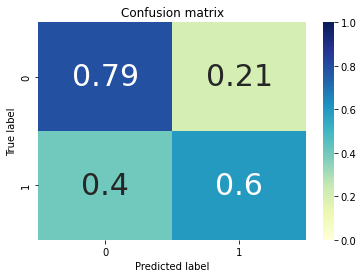

In [10]:
#Evaluation using Confusion matrix
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,y_pred) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')

In [11]:
#checking prediction value
model.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

Setup Decision tree with entropy

In [12]:
# Create Decision Tree classifer object
model1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model1 = model1.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model1.predict(x_test)

errors = abs(y_pred - y_test)
mean_error = np.mean(errors)
print(classification_report(y_test,y_pred))
decision_tree_entropy_results = {'model': 'tree_entropy', 'error': mean_error, 'accuracy': accuracy_score(y_test, y_pred) * 100}

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       130
           1       0.63      0.50      0.56        62

    accuracy                           0.74       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.74      0.74       192



The classification rate increased to 74%, which is better accuracy than the previous model.



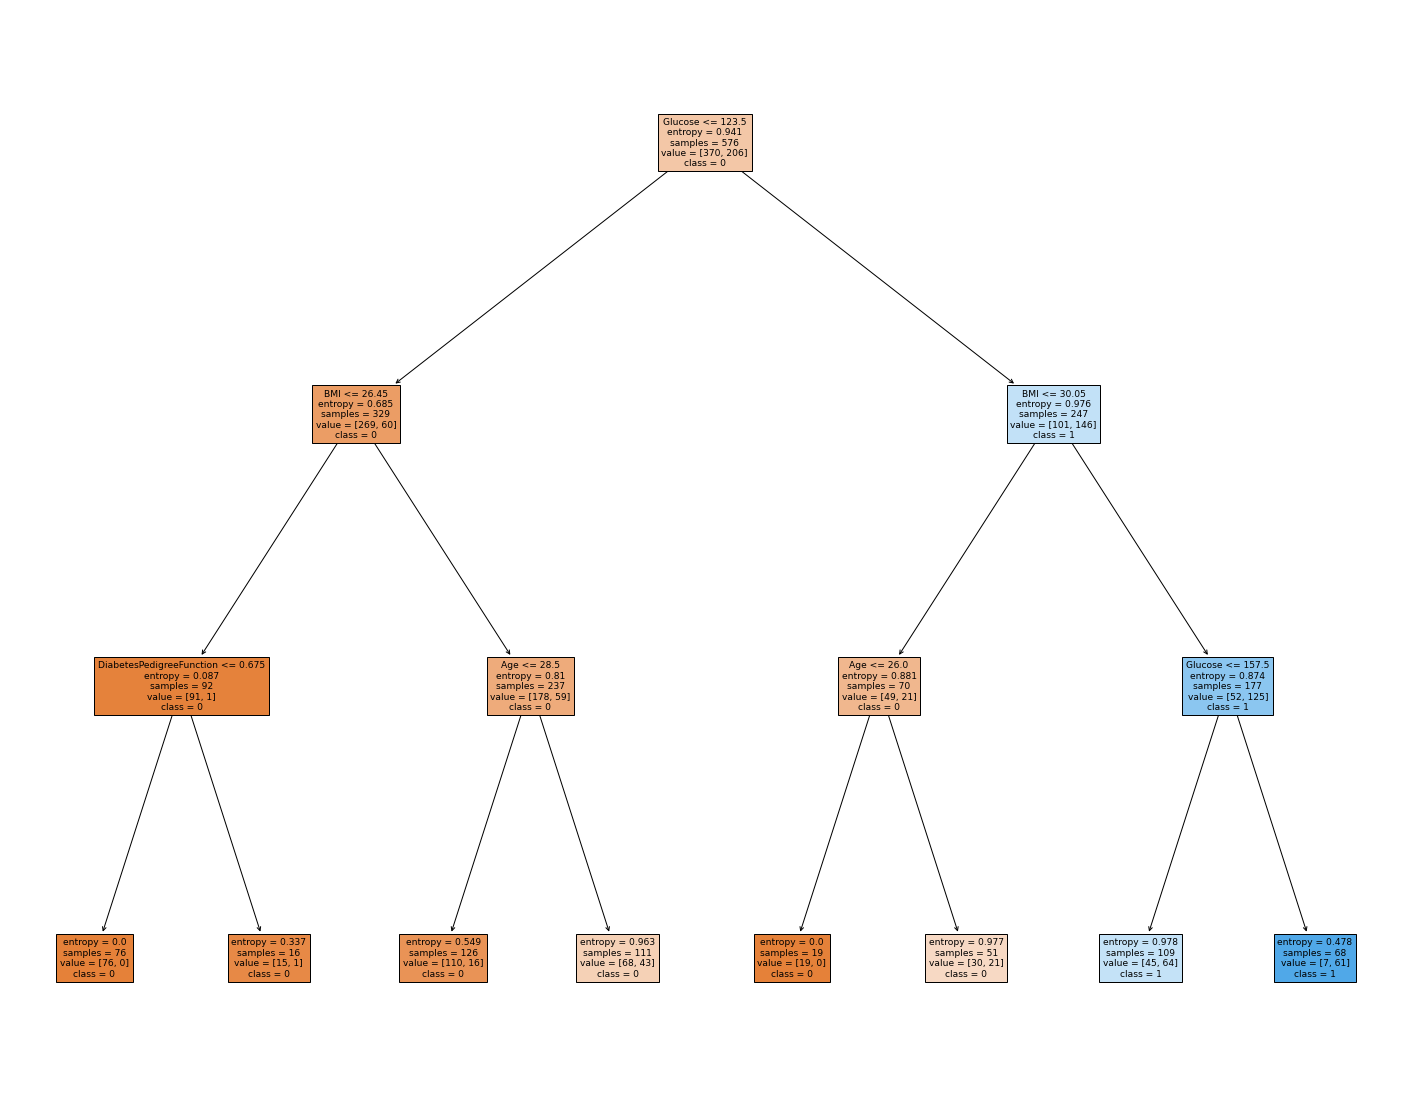

In [13]:
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(model1, 
                   feature_names=features.columns,  
                   class_names=['0','1'],
                   filled=True)

Randomized Search CV

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


K fold 5 times for random search cv

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='accuracy', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [16]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2000}

Setup default random forest model

In [17]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
baseline_results = evaluate_model('baseline', base_model, x_train, y_train, x_test, y_test)

Model Performance
Average Error: 0.2240 degrees.
accuracy = 77.60%.


In [18]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
random_results = evaluate_model('random_Search', best_random, x_train, y_train, x_test, y_test)

Model Performance
Average Error: 0.2240 degrees.
accuracy = 77.60%.


Compare model from random search cv and default model

In [19]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


Grid Search CV with K fold 5 times

In [20]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy', 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [21]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train);

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [22]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [23]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)
first_grid = evaluate_model('first_grid', best_grid, x_train, y_train, x_test, y_test)

Model Performance
Average Error: 0.2031 degrees.
accuracy = 79.69%.


Compare model from grid search cv and default model

In [24]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.68%.


Second grid search cv with different parameter, K fold 5 times

In [25]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy', 
                                 cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(x_train, y_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [26]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 75}

In [27]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, x_test, y_test)
second_grid = evaluate_model('second_grid', best_grid_final, x_train, y_train, x_test, y_test)

Model Performance
Average Error: 0.2083 degrees.
accuracy = 79.17%.


Compare second grid search cv model and default model

In [28]:
print(grid_final_accuracy, base_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

79.16666666666666 77.60416666666666
Improvement of 2.01%.


Use the best grid search cv model

In [29]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, x_test, y_test)

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 0.2031 degrees.
accuracy = 79.69%.


In [30]:
baseline_results

{'accuracy': 77.60416666666666,
 'error': 0.22395833333333334,
 'model': 'baseline'}

Compare all model by bar chart

In [31]:
comparison = {'model': [decision_tree_results['model'], decision_tree_entropy_results['model']],
              'accuracy': [round(decision_tree_results['accuracy'], 3), round(decision_tree_entropy_results['accuracy'], 3)],
              'error': [round(decision_tree_results['error'], 3), round(decision_tree_entropy_results['error'], 3)]}
                        
for model in [baseline_results, random_results, first_grid, second_grid]:
    comparison['model'].append(model['model'])
    comparison['accuracy'].append(round(model['accuracy'], 3))
    comparison['error'].append(round(model['error'], 3))

In [32]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [33]:
comparison[['model', 'accuracy', 'error']]

,model,accuracy,error
0,decision_tree,72.917,0.271
1,tree_entropy,74.479,0.255
2,baseline,77.604,0.224
3,random_Search,77.604,0.224
4,first_grid,79.688,0.203
5,second_grid,79.167,0.208


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


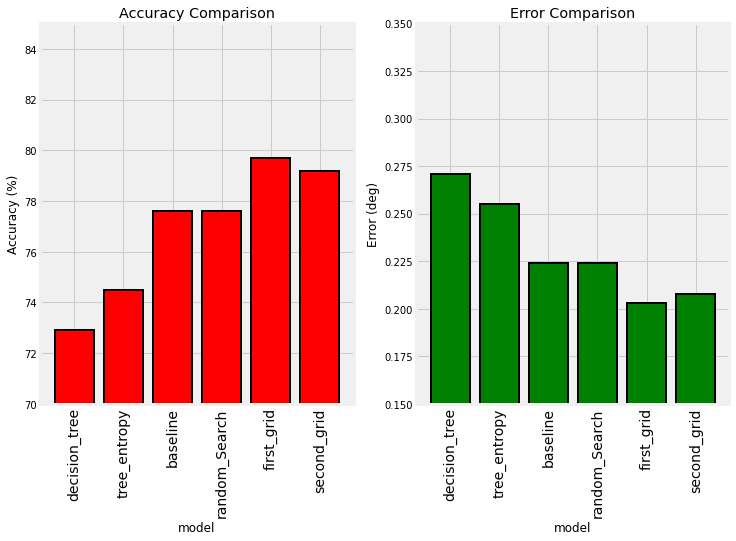

In [42]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(11, 7))
plt.subplot(121)
plt.bar(xvalues, comparison['accuracy'], color = 'r', edgecolor = 'k', linewidth = 2)
plt.xticks(xvalues, comparison['model'], rotation = 90, fontsize = 14)
plt.ylim(ymin = 70, ymax = 85)
plt.xlabel('model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['error'], color = 'g', edgecolor = 'k', linewidth = 2)
plt.xticks(xvalues, comparison['model'], rotation = 90, fontsize = 14)
plt.ylim(ymin = 0.15, ymax = 0.35)
plt.xlabel('model'); plt.ylabel('Error (deg)'); plt.title('Error Comparison');
plt.show();

Therefore, the base model of the decision tree has the worst results and the entropy model is better than it. The base model of random forest gave the same result as random search cv, however, we performed two grid searches and they both outperformed the base model by at least 2%. Among the error results, we see the best results for grid search and the worst results for the base model of decision trees.